In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


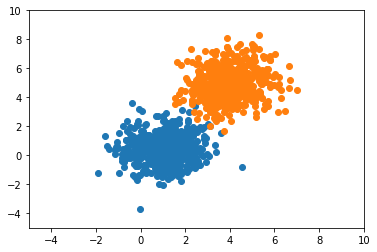

In [4]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [5]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print(data.shape)

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print(data.mean(axis=0))

(1000, 3)
[2.52713746 2.74233419 0.5       ]


In [6]:
np.random.shuffle(data)
print(data[:10])

[[ 4.09227067  5.52356559  1.        ]
 [ 2.13608572  1.7851981   0.        ]
 [ 3.75089016  5.2123985   1.        ]
 [ 3.72184668  5.43712033  1.        ]
 [-0.10149367  0.23261814  0.        ]
 [ 2.65989079 -0.64217377  0.        ]
 [ 3.36462122  5.25075596  1.        ]
 [ 3.41927525  2.63573162  0.        ]
 [ 4.07025533  7.03569408  1.        ]
 [ 2.92413298  3.28047301  1.        ]]


In [7]:
def distance(x1, x2):
    d = np.sqrt(((x1-x2)**2).sum())
    return d

def knn1(X_train, y_train, xt, k=150):
    vals = []
    for ix in range(X_train.shape[0]):
        d = distance(X_train[ix], xt)
        vals.append([d, y_train[ix]])
    sorted_labels = sorted(vals, key=lambda z: z[0])
    neighbours = np.asarray(sorted_labels)[:k, -1]
    
    freq = np.unique(neighbours, return_counts=True)
    print (freq)
    return freq[0][freq[1].argmax()]
def knn(X_train, y_train, xt, k=7):
    #TODO
    dist=[]
    for i in range(X_train.shape[0]):
        d=distance(X_train[i],xt)
        dist.append([d,y_train[i]])
    #print (dist)
    dist=sorted(dist)
    dist=np.asarray(dist)[:k,-1]
    dist=np.unique(dist,return_counts=True)
    return dist[0][dist[1].argmax()]

In [8]:
test_point = np.array([8, -4])

print(knn(data[:, :2], data[:, -1], test_point))

0.0


In [9]:
np.random.shuffle(data)
split = int(0.75 * data.shape[0])
# print split
train_data_X = data[:split, :2]
train_data_y = data[:split, -1]
test_data_X = data[split:, :2]
test_data_y = data[split:, -1]

print(train_data_X.shape, train_data_y.shape)
print(test_data_X.shape, test_data_y.shape)

(750, 2) (750,)
(250, 2) (250,)


In [10]:
def get_acc(kx):
    preds = []
    # print kx
    for ix in range(test_data_X.shape[0]):
        preds.append(knn(train_data_X, train_data_y, test_data_X[ix], k=kx))
    preds = np.asarray(preds)
    
    # print preds.shape
    return 100*float((test_data_y == preds).sum())/preds.shape[0]

print(get_acc(7))

100.0


In [11]:
for ix in range(2, 20):
    print ("k:", ix, "| Acc:", get_acc(ix))

k: 2 | Acc: 98.8
k: 3 | Acc: 99.6
k: 4 | Acc: 100.0
k: 5 | Acc: 100.0
k: 6 | Acc: 100.0
k: 7 | Acc: 100.0
k: 8 | Acc: 100.0
k: 9 | Acc: 100.0
k: 10 | Acc: 100.0
k: 11 | Acc: 100.0
k: 12 | Acc: 100.0
k: 13 | Acc: 100.0
k: 14 | Acc: 100.0
k: 15 | Acc: 100.0
k: 16 | Acc: 100.0
k: 17 | Acc: 100.0
k: 18 | Acc: 100.0
k: 19 | Acc: 100.0


In [12]:
import pandas as pd
import datetime

In [19]:
df = pd.read_csv('train.csv')
df.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [14]:
data = df.values[6000:8000]
print (data.shape)

(2000, 15)


In [15]:
split = int(0.8 * data.shape[0])

X_train = data[:split, 1:]
X_test = data[split:, 1:]

y_train = data[:split, 0]
y_test = data[split:, 0]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1600, 14) (1600,)
(400, 14) (400,)


ValueError: cannot reshape array of size 14 into shape (28,28)

In [17]:
def get_acc1(kx):
    #TODO
    right=0;
    total=X_test.shape[0]
    for i in range(total):
        group=knn(X_train,y_train,X_test[i],kx)
        if(group==y_test[i]):
            right+=1
    return 100*(right/float(total))

for i in range(500):
    if(i==2):
        print (i," ",get_acc1(i))
        


2   0.0


In [18]:

from sklearn.neighbors import KNeighborsClassifier
 
def get_acc2(kx):
    #TODO
    right=0;
    total=X_test.shape[0]
    for i in range(total):
        neigh = KNeighborsClassifier(n_neighbors=kx)
        neigh.fit(X_train, y_train)
        group=neigh.predict([X_test[i]])
        if(group==y_test[i]):
            right+=1
    return 100*(right/float(total))
for i in range(500):
    if(i>7 and i<15):
        print (i," ",get_acc2(i))
#get_acc2(10)

8   0.0
9   0.0
10   0.0
11   0.0
12   0.0
13   0.0
14   0.0
